In [2]:
import math
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
# simulation problem 17
n = 1000
p = 0.0034
m = 3000


def edge_counter(n, p):
    ans = 0
    A = [[0] * n for i in range(n)]
    for i in range(0, n):
        A[i][i] = 1
        for j in range(0, i):
            A[i][j] = bernoulli.rvs(p, size=1)
            # A[i][j] = np.random.binomial(1, p, size=1)[0]
            A[j][i] = A[i][j]
            ans += A[i][j]
    return ans


expected = 0
for i in range(0, 10):
    expected += (edge_counter(n, p) / 10)

print("Expected Value:", expected)

error = (expected - m) / expected
print("m error:", error)

Expected Value: [1690.2]
m error: [-0.77493788]


152.0


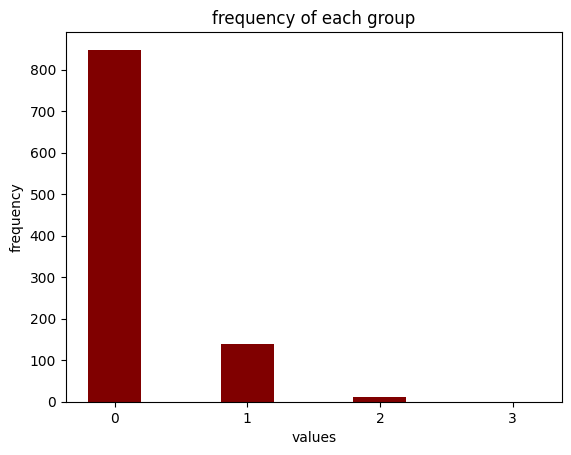

In [6]:
# simulation problem 18
n = 1000
p = 0.00016
mean_cnt = 0
total_arr = np.array([0])

for t in range(10):
    m = 0
    arr = np.array([0] * n)
    for i in range(n):
        for j in range(i + 1, n):
            x = sum(random.choices([True, False], [p, 1 - p], k=1))
            arr[i] = arr[i] + x
            arr[j] += x
            m += x

    l = 2 * m / n
    for r in range(n):
        if (arr[r] > l):
            mean_cnt += 1
    total_arr = np.concatenate((arr, total_arr))
print(mean_cnt / 10)

max_val = total_arr[0]
for i in range(10 * n + 1):
    if (total_arr[i] > max_val):
        max_val = total_arr[i]

x_arr = np.arange(max_val + 1)

y_arr = [0] * (max_val + 1)
for i in total_arr:
    y_arr[i] += 1

y_arr[0] -= 1
y_arr = np.multiply(y_arr, 1 / 10)

plt.bar(x_arr, y_arr, color='maroon', width=0.4)
plt.xticks(x_arr, x_arr)
plt.title('frequency of each group')
plt.xlabel('values')
plt.ylabel('frequency')
plt.show()

In [194]:
# simulation problem 19
N = 3000
matrix = np.array([0] * 9000000).reshape(3000, 3000)
p = 0.01
triangle_mean = 0
chain_mean = 0

for i in range(5):
    triangle = 0
    chain = 0
    for j in range(N):
        for t in range(j + 1, N):
            x = sum(random.choices([True, False], [p, 1 - p], k=1))
            matrix[j][t] = x
            matrix[t][j] = x
    for i in range(N):
        adjacent_nodes = []
        # khiar = 0
        for j in range(N):
            if matrix[i][j] == 1:
                adjacent_nodes.append(j)
        for j in adjacent_nodes:
            for k in adjacent_nodes:
                if matrix[j][k] == 1:
                    triangle += 1
                else:
                    chain += 1
    triangle /= 6
    chain /= 2
    triangle_mean += triangle
    chain_mean += chain

triangle_mean /= 5
chain_mean /= 5
print("mean of triangle is ", triangle_mean)
print("mean of chain is ", chain_mean)

mean of triangle is  4495.6
mean of chain is  1387012.2


In [195]:
# simulation problem 20
N = 1000
matrix = np.array([0] * 1000000).reshape(1000, 1000)
p = 0.003

mean_of_mean = 0
for z in range(100):
    for i in range(N):
        for j in range(i + 1, N):
            x = sum(random.choices([True, False], [p, 1 - p], k=1))
            matrix[i][j] = x
            matrix[j][i] = x

    mean = 0
    for i in range(N):
        adjacent_nodes = []
        #khiar = 0
        for j in range(N):
            if matrix[i][j] == 1:
                adjacent_nodes.append(j)
        for j in adjacent_nodes:
            for k in adjacent_nodes:
                if matrix[j][k] == 1:
                    mean += 1
    mean /= 2 * N
    print(mean)
    mean_of_mean += mean
print(mean_of_mean / 10)

0.015
0.006
0.012
0.012
0.009
0.018
0.012
0.009
0.012
0.003
0.009
0.018
0.021
0.015
0.012
0.027
0.009
0.018
0.018
0.018
0.018
0.009
0.012
0.012
0.021
0.012
0.018
0.015
0.012
0.006
0.015
0.018
0.009
0.003
0.009
0.015
0.012
0.018
0.009
0.015
0.006
0.006
0.006
0.003
0.021
0.018
0.003
0.024
0.024
0.024
0.018
0.027
0.012
0.012
0.015
0.006
0.006
0.015
0.024
0.006
0.021
0.006
0.018
0.03
0.006
0.006
0.012
0.018
0.012
0.015
0.006
0.006
0.018
0.018
0.012
0.003
0.018
0.021
0.018
0.015
0.015
0.018
0.021
0.012
0.027
0.018
0.009
0.003
0.009
0.006
0.009
0.015
0.012
0.012
0.018
0.006
0.012
0.009
0.009
0.006
0.13319999999999993


In [3]:
# simulation problem 21
def distances_from(n, matrix, i):
    visited = [False] * n
    dist = [n] * n
    list = []
    list.append(i)
    visited[i] = True
    dist[i] = 0

    while len(list) != 0:
        x = list.pop(0)
        for j in range(N):
            if matrix[x][j] == 1 and visited[j] == False:
                list.append(j)
                dist[j] = dist[x] + 1
                visited[j] = True
    return sum(dist)


N = 1000
matrix = np.array([0] * 1000000).reshape(1000, 1000)
p = 0.003

for i in range(N):
    for j in range(i + 1, N):
        x = sum(random.choices([True, False], [p, 1 - p], k=1))
        matrix[i][j] = x
        matrix[j][i] = x
mean = 0
for i in range(N):
    mean += distances_from(N, matrix, i)
print(mean / (N * (N - 1)))

136.94136136136137


In [169]:
# simulation problem 22
n = 50
p = 0.34


def diam_calc(n, p):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0, n)])
    for i in range(0, n):
        for j in range(0, i):
            if np.random.binomial(1, p, size=1)[0] == 1:
                G.add_edge(i, j)
    return nx.diameter(G)


diams = [0] * 100
for i in range(0, 100):
    diams[i] = diam_calc(n, p)

print(diams)
np.array(diams).mean()

[3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3]


2.81

In [187]:
# simulation problem 23
T = 100


def diam_mean_calc(T, n, p):
    diams = [0] * T
    for i in range(0, T):
        diams[i] = diam_calc(n, p)
    return np.array(diams).mean()


n_vals = [0] * 20
mean_diam_vals = [0] * 20
for i in range(0, 20):
    j = 10 * (i + 1)
    if i > 1:
        n_vals[i] = j
        mean_diam_vals[i] = diam_mean_calc(T, j, p)
    else:
        n_vals[i] = 0
        mean_diam_vals[i] = 0

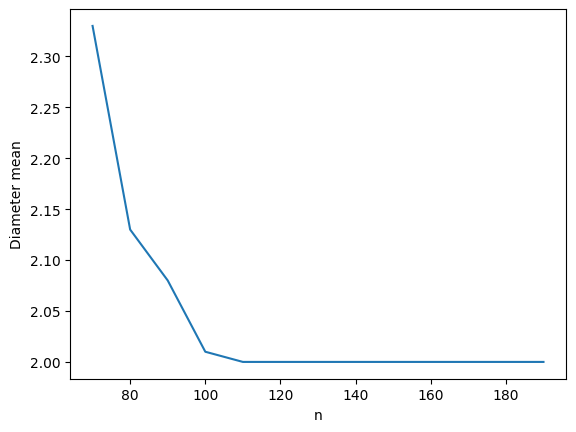

In [193]:
fig, ax = plt.subplots()
n_vals = n_vals[2:19]
mean_diam_vals = mean_diam_vals[2:19]
ax.plot(n_vals, mean_diam_vals)
ax.set_xlabel("n")
ax.set_ylabel("Diameter mean");

In [5]:
# simulation problem 24
n = 100
p = 0.34


def triangle_calc(n, p):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0, n)])
    for i in range(0, n):
        for j in range(0, i):
            if np.random.binomial(1, p, size=1)[0] == 1:
                G.add_edge(i, j)
    return nx.triangles(G, 0)


triangles = [0] * 100
for i in range(0, 100):
    triangles[i] = triangle_calc(n, p)

print(triangles)
np.array(triangles).mean()

[263, 201, 177, 119, 183, 258, 190, 211, 328, 134, 130, 218, 101, 247, 181, 112, 135, 215, 139, 120, 143, 162, 208, 173, 126, 246, 140, 139, 164, 128, 202, 236, 190, 157, 145, 248, 164, 199, 287, 224, 176, 207, 203, 231, 134, 258, 274, 296, 144, 202, 93, 149, 179, 139, 204, 111, 155, 151, 225, 239, 182, 308, 179, 222, 293, 245, 214, 164, 160, 208, 98, 227, 214, 216, 155, 168, 185, 145, 295, 191, 158, 253, 157, 232, 140, 98, 174, 194, 120, 160, 106, 284, 270, 162, 121, 233, 182, 199, 148, 302]


188.75

In [6]:
# simulation problem 25
T = 100


def triangle_mean_calc(T, n, p):
    triangles = [0] * T
    for i in range(0, T):
        triangles[i] = triangle_calc(n, p)
    return np.array(triangles).mean()


n_vals = [0] * 10
mean_triangle_vals = [0] * 10
for i in range(0, 10):
    j = 10 * (i + 1)
    n_vals[i] = j
    mean_triangle_vals[i] = triangle_mean_calc(T, j, (60 / (math.pow(j, 2))))

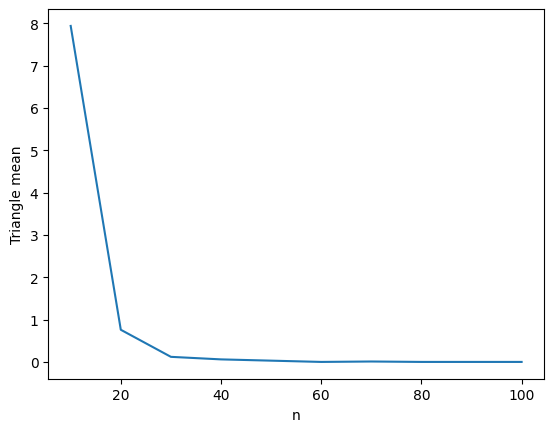

In [7]:
fig, ax1 = plt.subplots()
ax1.plot(n_vals, mean_triangle_vals)
ax1.set_xlabel("n")
ax1.set_ylabel("Triangle mean");

In [8]:
# simulation problem 26
T = 100


def triangle_mean_calc(T, n, p):
    triangles = [0] * T
    for i in range(0, T):
        triangles[i] = triangle_calc(n, p)
    return np.array(triangles).mean()


n_vals = [0] * 10
mean_triangle_vals = [0] * 10
for i in range(0, 10):
    j = 10 * (i + 1)
    n_vals[i] = j
    mean_triangle_vals[i] = triangle_mean_calc(T, j, p)

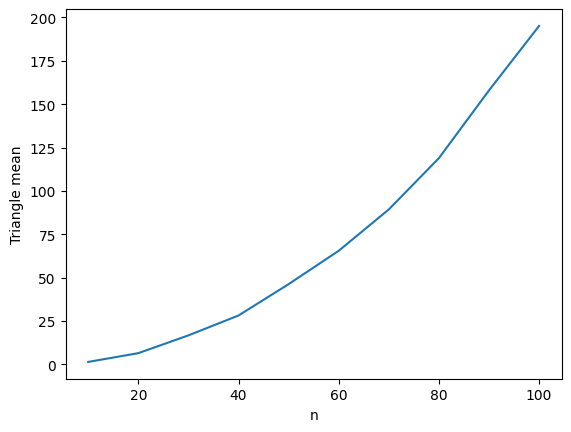

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(n_vals, mean_triangle_vals)
ax1.set_xlabel("n")
ax1.set_ylabel("Triangle mean");

In [16]:
# simulation problem 27
T = 100


def triangle_mean_calc(T, n, p):
    triangles = [0] * T
    for i in range(0, T):
        triangles[i] = triangle_calc(n, p)
    return np.array(triangles).mean()


n_vals = [0] * 10
mean_triangle_vals = [0] * 10
for i in range(0, 10):
    j = 10 * (i + 1)
    n_vals[i] = j
    mean_triangle_vals[i] = mean_triangle_vals[i - 1] + triangle_mean_calc(T, j, 1 / j)


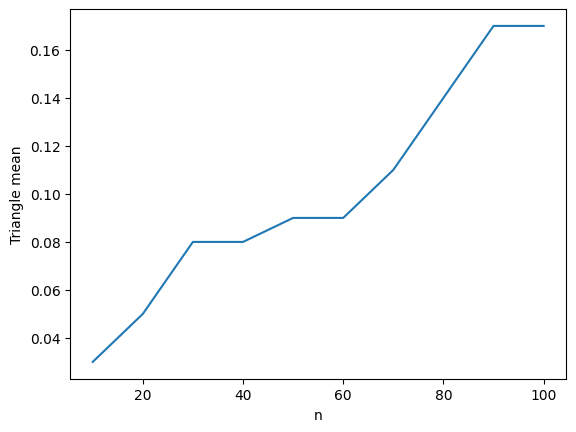

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(n_vals, mean_triangle_vals)
ax1.set_xlabel("n")
ax1.set_ylabel("Triangle mean");

In [ ]:
# simulation problem 27
# T = 100
#
# def triangle_mean_calc(T, n, p):
#     triangles = [0] * T
#     for i in range(0, T):
#         triangles[i] = triangle_calc(n, p)
#     return np.array(triangles).mean()
#
# n_vals = [0] * 24
# mean_triangle_vals = [0] * 24
# for i in range(0, 24):
#     j = 50 * (i + 1)
#     n_vals[i] = j
#     mean_triangle_vals[i] = triangle_mean_calc(T, j, 1/j)

In [ ]:
# fig, ax1 = plt.subplots()
# ax1.plot(n_vals, mean_triangle_vals)
# ax1.set_xlabel("n")
# ax1.set_ylabel("Triangle mean");